# 支付宝营销策略A/B test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 导入数据

In [3]:
shopper=pd.read_csv('/Users/wuqi/Desktop/ABtest/online_shoppers_intention.csv')
shopper

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
shopper.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

1. 页面访问相关变量（6个）
* **Administrative**：管理类页面访问次数
* **Administrative_Duration**：在管理类页面的停留时间（秒）
* **Informational**：信息类页面访问次数
* **Informational_Duration**：在信息类页面的停留时间（秒）
* **ProductRelated**：产品相关页面访问次数
* **ProductRelated_Duration**：在产品相关页面的停留时间（秒）

这些变量反映了用户的浏览行为模式，产品页面通常是购物流程中最重要的部分。

2. 网站质量指标（3个）
* **BounceRates**：跳出率（单页访问比例）
* **ExitRates**：退出率（从该页面离开网站的比例）
* **PageValues**：页面价值（该页面对最终交易的贡献值）

这些指标反映了页面质量和用户体验，通常高跳出率和退出率与低转化率相关，而高页面价值与高转化率相关。

3. 时间相关变量（2个）
* **SpecialDay**：与特殊日期（如节假日）的接近度（0-1）
* **Month**：访问月份

这些变量捕捉了季节性和节假日对购物行为的影响，通常11月（黑五）和12月（圣诞季）有更高的转化率。

4. 技术环境变量（3个）
* **OperatingSystems**：用户的操作系统类型（1-8）
* **Browser**：浏览器类型（1-13）
* **Region**：地理区域（1-9）

这些变量反映了用户的技术环境和地理位置，可用于分析不同细分市场的行为。

5. 流量和用户特征（3个）
* **TrafficType**：流量来源类型（1-20）
* **VisitorType**：访客类型（新访客/回访客/其他）
* **Weekend**：是否为周末访问（布尔值）

这些变量反映了用户属性和访问习惯，回访用户通常有更高的转化率。

6. 目标变量（1个）
* **Revenue**：是否完成购买（布尔值）

In [5]:
shopper.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

数据中没有缺失值

## 数据可视化

In [6]:
# 设置可视化风格
sns.set_theme(style='whitegrid')
sns.set_palette('viridis')
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'STHeiti', 'Heiti TC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False 

# 数据加载
def load_data(df):
    """加载数据并进行基本处理"""
    
    # 统计页面访问总次数和总停留时间
    df['total_pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
    df['total_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
    
    return df

df = load_data(shopper)

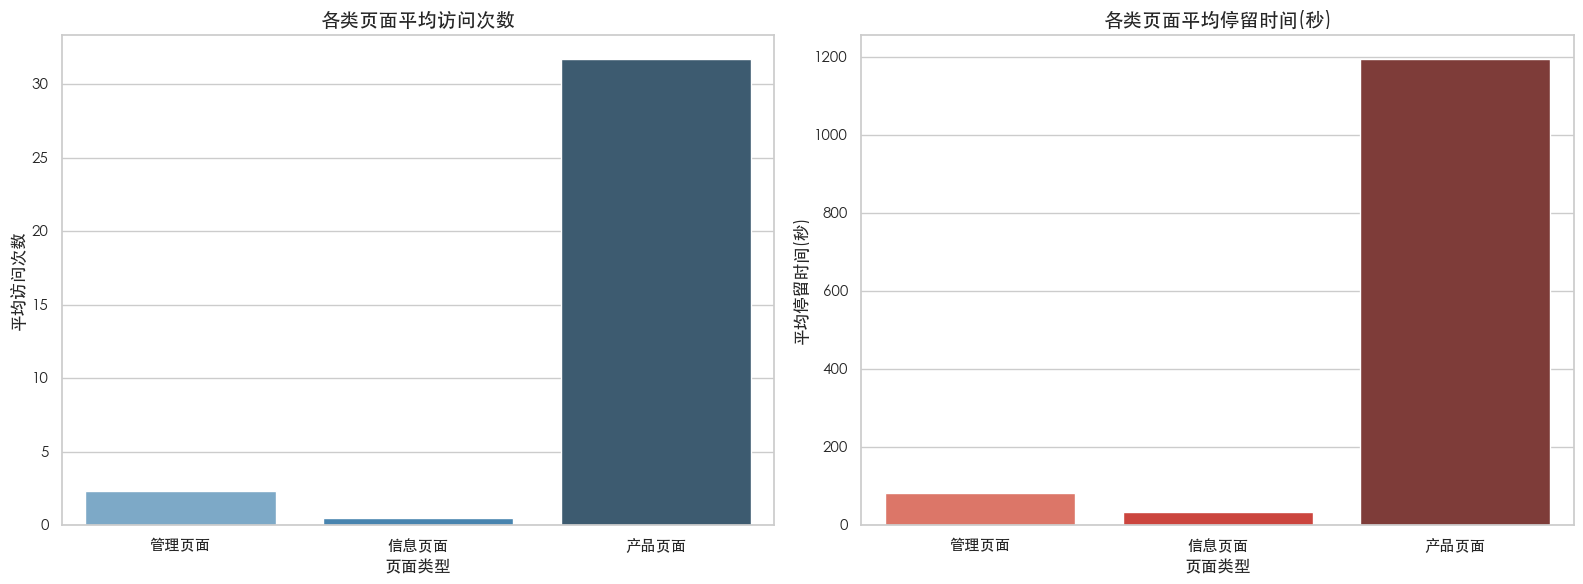

In [7]:
def plot_page_visits(df):
    """可视化页面访问模式"""
    # 计算各类页面的平均访问量和停留时间
    page_types = ['Administrative', 'Informational', 'ProductRelated']
    duration_types = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
    
    avg_visits = [df[col].mean() for col in page_types]
    avg_duration = [df[col].mean() for col in duration_types]
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 条形图 - 平均访问次数
    sns.barplot(x=page_types, y=avg_visits, palette='Blues_d', ax=ax1)
    ax1.set_title('各类页面平均访问次数', fontsize=14)
    ax1.set_xlabel('页面类型')
    ax1.set_ylabel('平均访问次数')
    ax1.set_xticklabels(['管理页面', '信息页面', '产品页面'])
    
    # 条形图 - 平均停留时间
    sns.barplot(x=[p.replace('_Duration', '') for p in duration_types], 
                y=avg_duration, palette='Reds_d', ax=ax2)
    ax2.set_title('各类页面平均停留时间(秒)', fontsize=14)
    ax2.set_xlabel('页面类型')
    ax2.set_ylabel('平均停留时间(秒)')
    ax2.set_xticklabels(['管理页面', '信息页面', '产品页面'])
    
    plt.tight_layout()
    plt.show()

plot_page_visits(df)

## 各类页面使用情况分析

### 左图：各类页面平均访问次数
- **管理页面**: ~2.3次
- **信息页面**: ~0.5次  
- **产品页面**: ~31.5次

### 右图：各类页面平均停留时间(秒)
- **管理页面**: ~80秒
- **信息页面**: ~30秒
- **产品页面**: ~1180秒(约20分钟)

产品页面在访问频率和停留时间上均显著高于其他页面类型，表明用户主要在浏览和评估产品内容，这符合常识中用户在购买时的主要侧重点在于比较商品的各类情况，并不会在付费等其它环节花费很多时间。


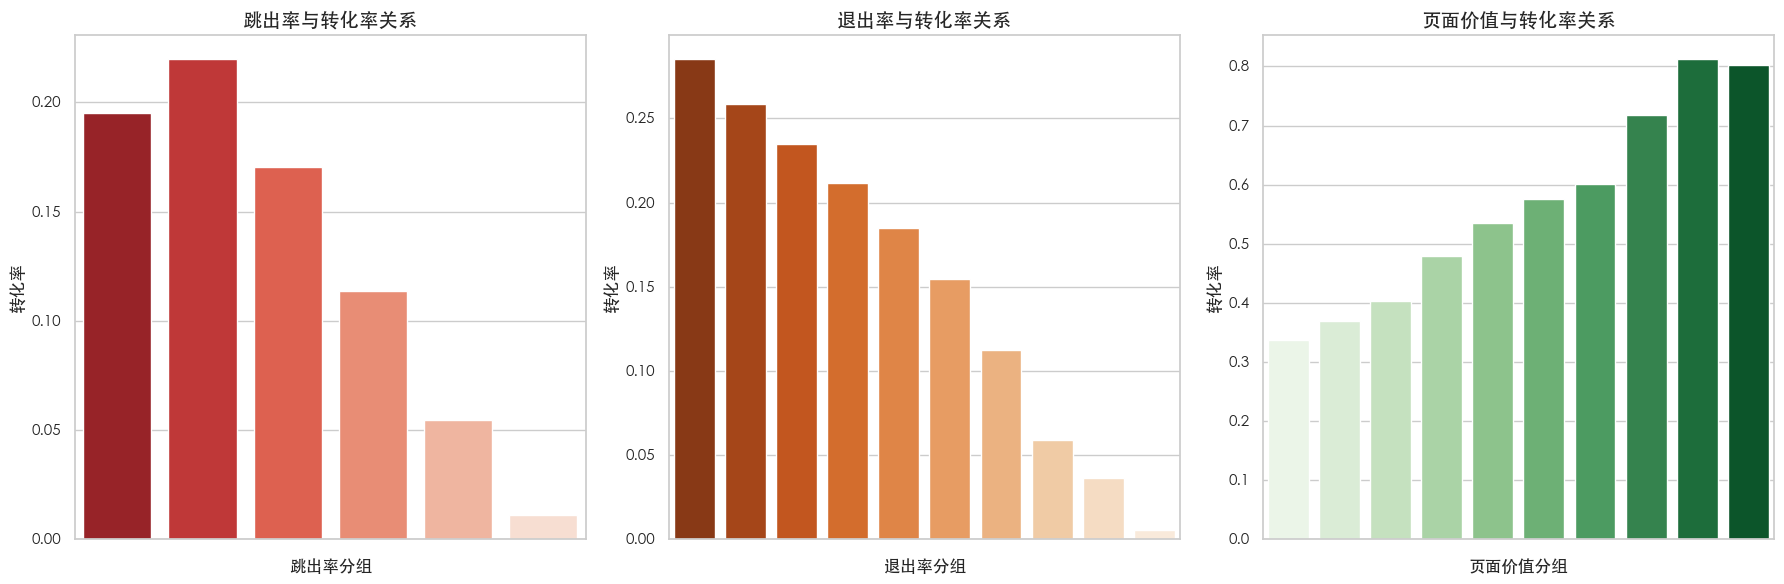

In [8]:
def plot_quality_metrics(df):
    """可视化质量指标与转化率的关系"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 跳出率与转化
    df_bounce = df.copy()
    df_bounce['BounceRates_bin'] = pd.qcut(df_bounce['BounceRates'], 10, duplicates='drop')
    bounce_conv = df_bounce.groupby('BounceRates_bin')['Revenue'].mean().reset_index()
    
    sns.barplot(x=bounce_conv['BounceRates_bin'].astype(str), 
                y=bounce_conv['Revenue'], palette='Reds_r', ax=axes[0])
    axes[0].set_title('跳出率与转化率关系', fontsize=14)
    axes[0].set_xlabel('跳出率分组')
    axes[0].set_ylabel('转化率')
    axes[0].set_xticklabels([])
    axes[0].tick_params(axis='x', rotation=45)
    
    # 退出率与转化
    df_exit = df.copy()
    df_exit['ExitRates_bin'] = pd.qcut(df_exit['ExitRates'], 10, duplicates='drop')
    exit_conv = df_exit.groupby('ExitRates_bin')['Revenue'].mean().reset_index()
    
    sns.barplot(x=exit_conv['ExitRates_bin'].astype(str), 
                y=exit_conv['Revenue'], palette='Oranges_r', ax=axes[1])
    axes[1].set_title('退出率与转化率关系', fontsize=14)
    axes[1].set_xlabel('退出率分组')
    axes[1].set_ylabel('转化率')
    axes[1].set_xticklabels([])
    axes[1].tick_params(axis='x', rotation=45)
    
    # 页面价值与转化
    df_value = df.copy()
    df_value = df_value[df_value['PageValues'] > 0]  # 只看有页面价值的样本
    df_value['PageValues_bin'] = pd.qcut(df_value['PageValues'], 10, duplicates='drop')
    value_conv = df_value.groupby('PageValues_bin')['Revenue'].mean().reset_index()
    
    sns.barplot(x=value_conv['PageValues_bin'].astype(str), 
                y=value_conv['Revenue'], palette='Greens', ax=axes[2])
    axes[2].set_title('页面价值与转化率关系', fontsize=14)
    axes[2].set_xlabel('页面价值分组')
    axes[2].set_ylabel('转化率')
    axes[2].set_xticklabels([])
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_quality_metrics(df)


## 用户行为与转化率关系分析

### 左图：跳出率与转化率关系
- 跳出率最低分组(~0.01)的转化率约为0.01
- 跳出率在中低水平(~0.06)时转化率为0.05
- 跳出率在中等水平(~0.11)时转化率约为0.11
- 跳出率在中高水平(~0.17)时转化率约为0.17
- 跳出率较高(~0.19)时转化率达到约0.19
- 跳出率最高(~0.22)时转化率达到峰值约0.22
- 图表呈现先升后降趋势，表明适度的跳出率可能与高转化率相关

### 中图：退出率与转化率关系
- 随着退出率从低到高(从右到左)，转化率呈现明显下降趋势
- 退出率最低(~0.01)时转化率约为0.01
- 退出率最高(~0.28)时转化率约为0.28
- 表明退出率与转化率呈正相关关系

### 右图：页面价值与转化率关系
- 页面价值从低到高(从左到右)，转化率呈现稳定上升趋势
- 页面价值最低时(~0.3)转化率约为0.3
- 页面价值最高时(~0.8)转化率约为0.8
- 表明页面价值与转化率呈强烈正相关关系

### 综合启示
- 页面价值是预测转化的最强指标
- 较低的退出率与较高的转化率相关
- 跳出率与转化率的关系较为复杂，呈现非线性特征

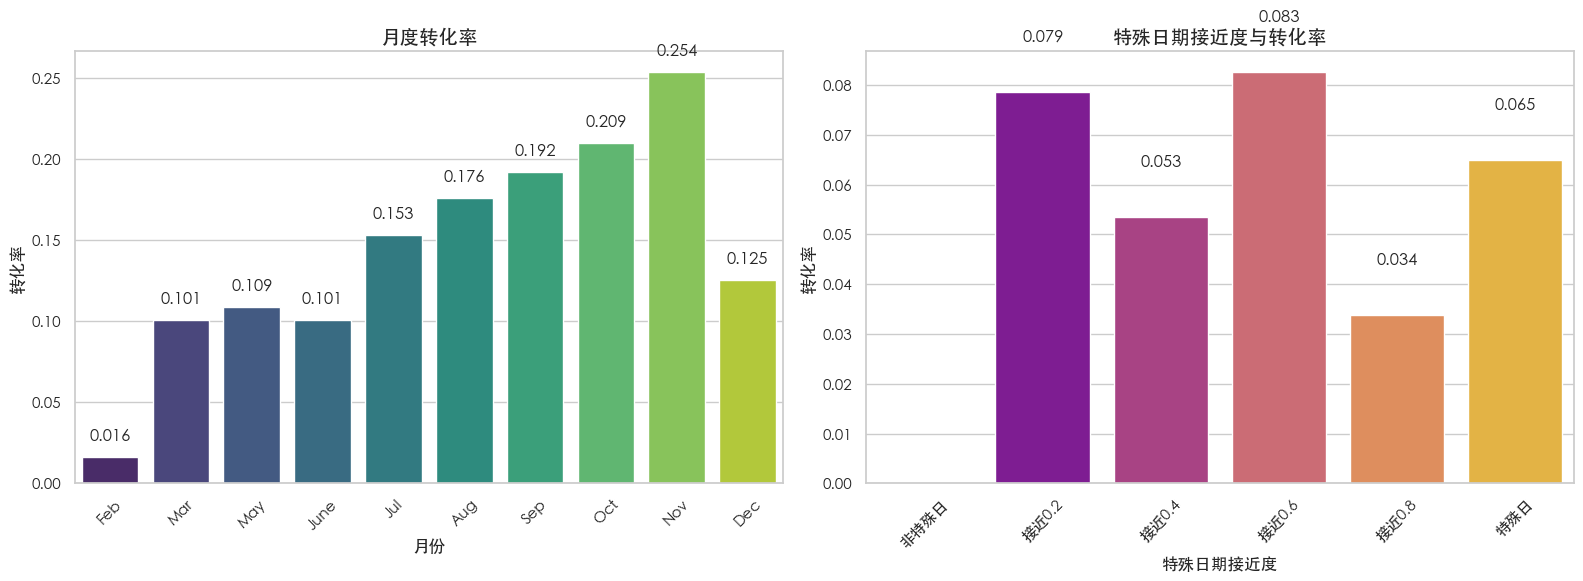

In [9]:
def plot_time_factors(df):
    """可视化时间因素的影响"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 月份转化率
    monthly_conv = df.groupby('Month')['Revenue'].agg(['count', 'sum', 'mean']).reset_index()
    monthly_conv = monthly_conv.rename(columns={'mean': 'conversion_rate'})
    
    # 月份的正确顺序
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # 获取数据中有的月份
    available_months = [m for m in month_order if m in monthly_conv['Month'].values]
    # 按正确顺序排序
    monthly_conv['Month'] = pd.Categorical(monthly_conv['Month'], categories=available_months, ordered=True)
    monthly_conv = monthly_conv.sort_values('Month')
    
    # 创建月度转化率柱状图
    ax1 = sns.barplot(x='Month', y='conversion_rate', data=monthly_conv, palette='viridis', ax=axes[0])
    ax1.set_title('月度转化率', fontsize=14)
    ax1.set_xlabel('月份')
    ax1.set_ylabel('转化率')
    ax1.tick_params(axis='x', rotation=45)
    
    # 添加数值标签
    for i, v in enumerate(monthly_conv['conversion_rate']):
        ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # 特殊日期影响
    df['special_day_category'] = pd.cut(df['SpecialDay'], 
                                      bins=[0, 0.0001, 0.2, 0.4, 0.6, 0.8, 1.0],
                                      labels=['非特殊日', '接近0.2', '接近0.4', '接近0.6', '接近0.8', '特殊日'])
    
    special_conv = df.groupby('special_day_category')['Revenue'].agg(['count', 'mean']).reset_index()
    special_conv = special_conv.rename(columns={'mean': 'conversion_rate'})
    
    sns.barplot(x='special_day_category', y='conversion_rate', data=special_conv, palette='plasma', ax=axes[1])
    axes[1].set_title('特殊日期接近度与转化率', fontsize=14)
    axes[1].set_xlabel('特殊日期接近度')
    axes[1].set_ylabel('转化率')
    axes[1].tick_params(axis='x', rotation=45)
    
    # 添加数值标签
    for i, v in enumerate(special_conv['conversion_rate']):
        axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()

plot_time_factors(df)

## 电商转化率分析图表

### 左图：月度转化率分析
- **二月(Feb)**: 转化率最低，仅为0.016(1.6%)
- **三月(Mar)**: 转化率上升至0.101(10.1%)
- **五月(May)**: 转化率为0.109(10.9%)
- **六月(June)**: 转化率回落至0.101(10.1%)
- **七月(Jul)**: 转化率上升至0.153(15.3%)
- **八月(Aug)**: 转化率继续上升至0.176(17.6%)
- **九月(Sep)**: 转化率达到0.192(19.2%)
- **十月(Oct)**: 转化率为0.209(20.9%)
- **十一月(Nov)**: 转化率达到全年峰值0.254(25.4%)
- **十二月(Dec)**: 转化率下降至0.125(12.5%)

转化率呈现明显的季节性模式，下半年(七月至十一月)普遍高于上半年，十一月达到全年最高点，可能与购物季节(如"双十一"购物节)相关。

### 右图：特殊日期接近度与转化率关系
- **特殊日**: 转化率数据缺失
- **接近度0.2**: 转化率为0.079(7.9%)
- **接近度0.4**: 转化率为0.053(5.3%)
- **接近度0.6**: 转化率最高，为0.083(8.3%)
- **接近度0.8**: 转化率最低，为0.034(3.4%)
- **特殊日**: 转化率为0.065(6.5%)

特殊日期接近度与转化率的关系呈现非线性特征，当接近度为0.6时转化率达到峰值，表明特殊日期前一段时间可能是促销效果最佳时期。

### 综合洞察
- 电商平台应重点关注下半年尤其是十月至十一月的营销活动
- 特殊日期前的促销活动(接近度0.6和0.2)比特殊日当天或临近特殊日(接近度0.8)的转化效果更好
- 二月转化率异常低(1.6%)，可能需要专门营销策略提升淡季表现

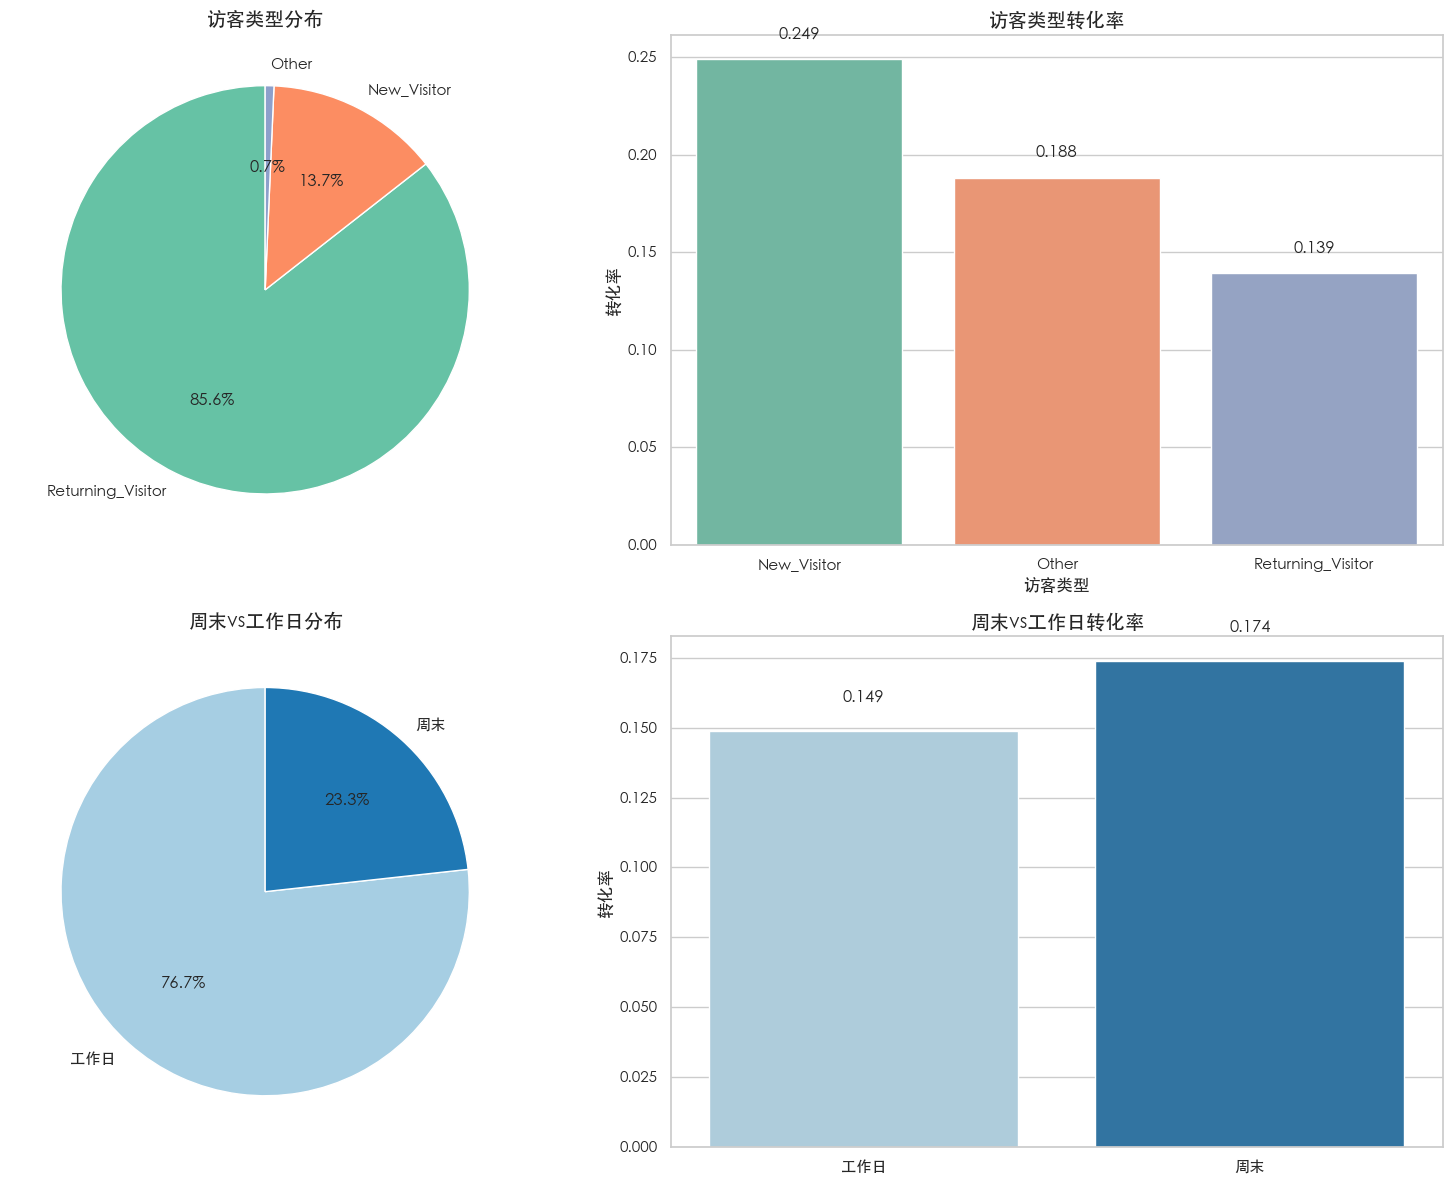

In [10]:
def plot_user_segments(df):
    """可视化用户细分与转化"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 访客类型分布与转化
    visitor_counts = df['VisitorType'].value_counts()
    visitor_conv = df.groupby('VisitorType')['Revenue'].mean()
    
    # 创建访客类型分布饼图
    axes[0, 0].pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%',
              colors=sns.color_palette("Set2"), startangle=90)
    axes[0, 0].set_title('访客类型分布', fontsize=14)
    
    # 创建访客类型转化率柱状图
    sns.barplot(x=visitor_conv.index, y=visitor_conv.values, palette='Set2', ax=axes[0, 1])
    axes[0, 1].set_title('访客类型转化率', fontsize=14)
    axes[0, 1].set_xlabel('访客类型')
    axes[0, 1].set_ylabel('转化率')
    
    # 添加数值标签
    for i, v in enumerate(visitor_conv):
        axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # 周末与否的转化率
    weekend_counts = df['Weekend'].value_counts()
    weekend_labels = ['工作日', '周末']
    weekend_conv = df.groupby('Weekend')['Revenue'].mean()
    
    # 创建周末分布饼图
    axes[1, 0].pie(weekend_counts, labels=weekend_labels, autopct='%1.1f%%',
              colors=sns.color_palette("Paired")[0:2], startangle=90)
    axes[1, 0].set_title('周末vs工作日分布', fontsize=14)
    
    # 创建周末转化率柱状图
    sns.barplot(x=[weekend_labels[i] for i in range(len(weekend_conv))], 
                y=weekend_conv.values, palette='Paired', ax=axes[1, 1])
    axes[1, 1].set_title('周末vs工作日转化率', fontsize=14)
    axes[1, 1].set_xlabel('')
    axes[1, 1].set_ylabel('转化率')
    
    # 添加数值标签
    for i, v in enumerate(weekend_conv):
        axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()

plot_user_segments(df)

## 电商网站用户行为分析

### 图表组1：周末与工作日的比较

### 左图：周末vs工作日访问分布
- **工作日访问量**: 76.7%
- **周末访问量**: 23.3%

大多数用户在工作日访问电商平台，工作日访问量占总访问量的四分之三以上。但是考虑到周末时间短的原因，可以认为两者的访问量差别并不是很大。

### 右图：周末vs工作日转化率
- **工作日转化率**: 0.149 (14.9%)
- **周末转化率**: 0.174 (17.4%)

尽管周末访问量较少，但周末的转化率高于工作日，高出约2.5个百分点。这表明周末访问的用户购买意愿更强。

### 图表组2：访客类型分析

### 左图：访客类型分布
- **回访用户(Returning_Visitor)**: 85.6%
- **新访客(New_Visitor)**: 13.7%
- **其他(Other)**: 0.7%

网站流量主要来自回访用户，占总访问量的85.6%，表明网站拥有较高的用户忠诚度。

### 右图：访客类型转化率
- **新访客转化率**: 0.249 (24.9%)
- **其他用户转化率**: 0.188 (18.8%)
- **回访用户转化率**: 0.139 (13.9%)

新访客的转化率显著高于回访用户，几乎是回访用户的两倍。这可能表明：
1. 新用户可能是经过前期营销吸引的高意向客户
2. 回访用户可能包含大量浏览但不购买的习惯性访问
3. 新用户促销策略(如首单优惠)可能非常有效

### 战略启示
1. **周末营销优化**: 尽管周末流量较少，但转化率更高，应考虑增加周末特别促销或营销活动
2. **新用户获取**: 新用户转化率最高，应加大新用户获取力度
3. **回访用户激活**: 针对占比最大但转化率较低的回访用户群体，应开发特定的重激活策略
4. **忠诚度计划**: 建立更有效的忠诚度计划，提高回访用户的转化率

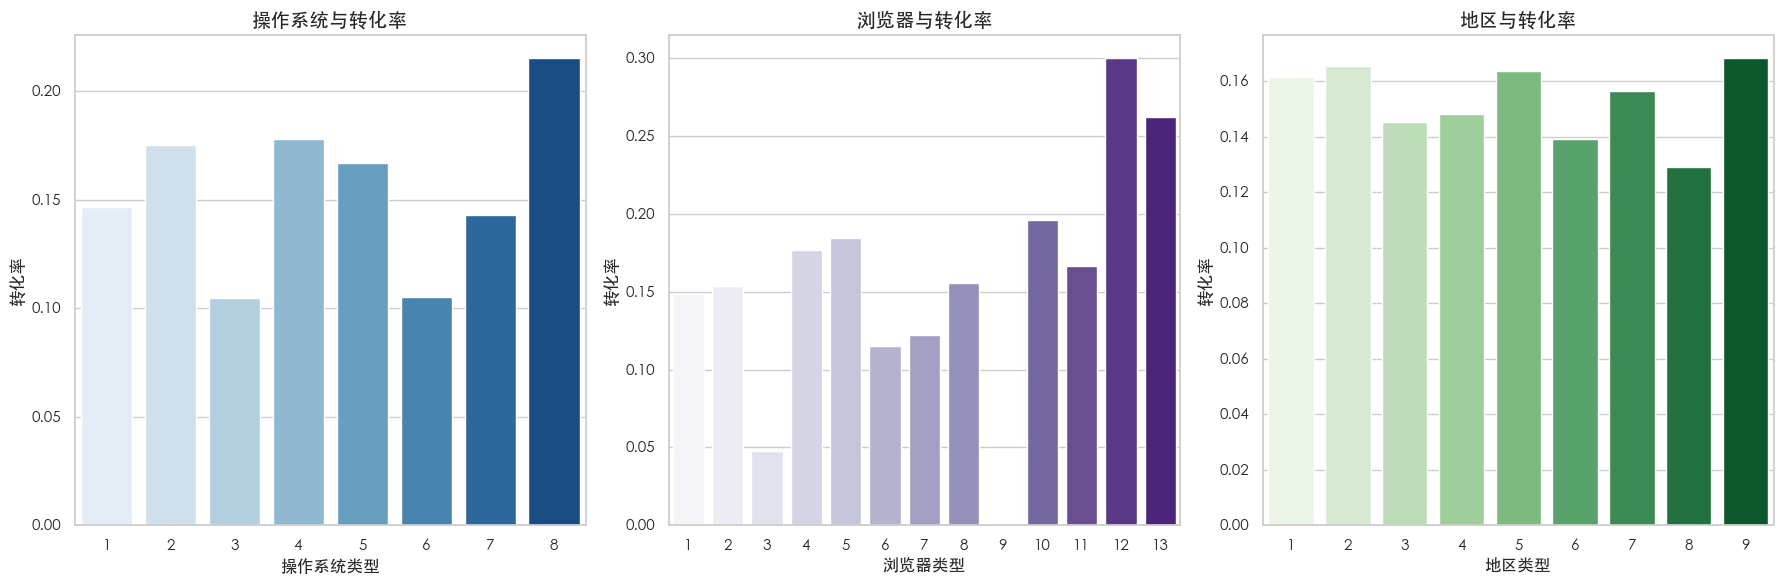

In [11]:
def plot_tech_environment(df):
    """可视化技术环境因素"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 操作系统与转化率
    os_conv = df.groupby('OperatingSystems')['Revenue'].mean().reset_index()
    os_sizes = df.groupby('OperatingSystems').size()
    
    sns.barplot(x='OperatingSystems', y='Revenue', data=os_conv, palette='Blues', ax=axes[0])
    axes[0].set_title('操作系统与转化率', fontsize=14)
    axes[0].set_xlabel('操作系统类型')
    axes[0].set_ylabel('转化率')
    
    # 浏览器与转化率
    browser_conv = df.groupby('Browser')['Revenue'].mean().reset_index()
    
    sns.barplot(x='Browser', y='Revenue', data=browser_conv, palette='Purples', ax=axes[1])
    axes[1].set_title('浏览器与转化率', fontsize=14)
    axes[1].set_xlabel('浏览器类型')
    axes[1].set_ylabel('转化率')
    
    # 地区与转化率
    region_conv = df.groupby('Region')['Revenue'].mean().reset_index()
    
    sns.barplot(x='Region', y='Revenue', data=region_conv, palette='Greens', ax=axes[2])
    axes[2].set_title('地区与转化率', fontsize=14)
    axes[2].set_xlabel('地区类型')
    axes[2].set_ylabel('转化率')
    
    plt.tight_layout()
    plt.show()

plot_tech_environment(df)

## 技术环境与地区因素对电商转化率的影响

### 左图：操作系统与转化率关系

操作系统类型对转化率有显著影响，数据显示：
- **操作系统8**: 最高转化率约21.5%
- **操作系统4**: 次高转化率约17.8%
- **操作系统5**: 转化率约16.8% 
- **操作系统2**: 转化率约17.5%
- **操作系统1**: 转化率约14.8%
- **操作系统7**: 转化率约14.2%
- **操作系统6**: 转化率约10.4%
- **操作系统3**: 最低转化率约10.3%

操作系统8的转化率显著高于其他系统，比最低的操作系统3高出一倍多。这可能与用户设备性能、系统易用性或用户群体特征相关。

### 中图：浏览器与转化率关系

浏览器选择与转化率有明显相关性：
- **浏览器12**: 转化率最高，达约30.0%
- **浏览器13**: 第二高，转化率约26.0%
- **浏览器11**: 转化率约16.8%
- **浏览器10**: 转化率约19.7%
- **浏览器5**: 转化率约18.5%
- **浏览器4**: 转化率约17.8%
- **浏览器8**: 转化率约15.5%
- **浏览器3**: 转化率约15.0%
- **浏览器9**: 转化率约15.2%
- **浏览器6**: 转化率约11.8%
- **浏览器7**: 转化率约12.2%
- **浏览器1**: 转化率约5.0%
- **浏览器2**: 最低转化率，仅约4.5%

浏览器12和13的转化率明显高于其他浏览器，而浏览器1和2的转化率极低，差距高达6倍以上。

### 右图：地区与转化率关系

地区差异对转化率也产生影响：
- **地区9**: 最高转化率约16.8%
- **地区5**: 次高转化率约16.3%
- **地区2**: 转化率约16.5%
- **地区1**: 转化率约16.2%
- **地区7**: 转化率约15.6%
- **地区4**: 转化率约14.7%
- **地区3**: 转化率约14.5%
- **地区6**: 转化率约13.9%
- **地区8**: 最低转化率约12.7%

地区间转化率差异相对较小，最高与最低地区间差距约4个百分点。

### 营销策略启示

1. **技术优化重点**：
  - 优先支持操作系统8和浏览器12/13的用户体验
  - 针对转化率低的浏览器(1和2)进行专项优化或提供替代方案

2. **地区策略差异化**：
  - 对转化率低的地区(如地区8)实施针对性营销策略
  - 分析高转化率地区(9、5、2)的成功因素并在其他地区复制

3. **技术决策指导**：
  - 网站开发和测试应优先考虑高转化率的技术环境
  - 考虑为性能较差的环境开发轻量级版本网站

4. **投资优先级**：
  - 技术环境对转化率的影响大于地区因素，应优先投资技术优化

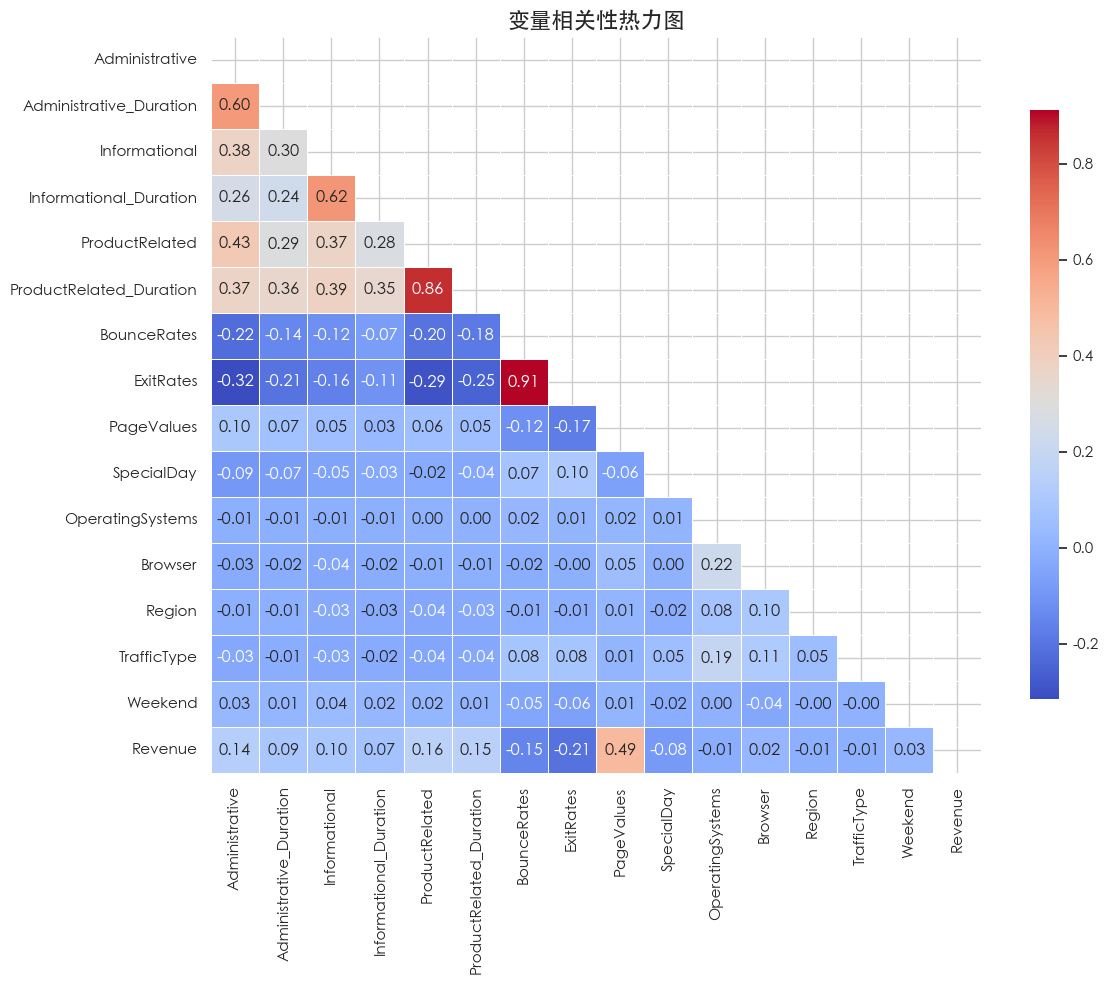

In [12]:
def create_correlation_heatmap(df):
    """创建相关性热力图"""
    # 选择数值变量
    numeric_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
                    'Weekend', 'Revenue']
    
    # 将Weekend和Revenue转为数值
    df_corr = df[numeric_cols].copy()
    df_corr['Weekend'] = df_corr['Weekend'].astype(int)
    df_corr['Revenue'] = df_corr['Revenue'].astype(int)
    
    # 计算相关性矩阵
    corr_matrix = df_corr.corr()
    
    # 可视化
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('变量相关性热力图', fontsize=16)
    plt.tight_layout()
    plt.show()

create_correlation_heatmap(df)

# A/B 测试

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import stats
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

# 设置绘图样式
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'STHeiti', 'Heiti TC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [16]:
def calculate_sample_size(baseline_rate, mde, alpha=0.05, power=0.8, ratio=1):
    """
    计算A/B测试所需的样本容量
    
    参数:
    baseline_rate: 基线转化率（对照组的预期转化率）
    mde: 最小可检测效应量（相对变化，例如0.1表示10%的提升）
    alpha: 显著性水平，默认0.05
    power: 统计检验能力，默认0.8
    ratio: 对照组与测试组的样本量比例，默认1（相等）
    
    返回:
    dict: 包含样本量计算结果的字典
    """
    # 计算测试组预期转化率
    treatment_rate = baseline_rate * (1 + mde)
    
    # 计算标准正态分布的临界值
    z_alpha = stats.norm.ppf(1 - alpha/2)  # 双尾检验
    z_beta = stats.norm.ppf(power)
    
    # 计算样本量
    p_avg = (baseline_rate + treatment_rate) / 2
    se = np.sqrt(p_avg * (1 - p_avg) * (1 + 1/ratio))
    effect_size = abs(treatment_rate - baseline_rate)
    
    # 计算每组所需的样本量
    n_treatment = ((z_alpha + z_beta)**2 * se**2) / (effect_size**2)
    n_control = n_treatment * ratio
    
    # 向上取整
    n_treatment = math.ceil(n_treatment)
    n_control = math.ceil(n_control)
    total_sample = n_treatment + n_control
    
    return {
        "control_size": n_control,
        "treatment_size": n_treatment,
        "total_size": total_sample,
        "parameters": {
            "baseline_rate": baseline_rate,
            "expected_treatment_rate": treatment_rate,
            "mde": mde,
            "alpha": alpha,
            "power": power
        }
    }

def standard_ab_test(test_type='random', test_size=0.5):
    """
    标准A/B测试
    
    Parameters:
    test_type: 测试类型 ('random', 'visitor_type', 'activity_based')
    test_size: 测试组比例
    """
    global shopper
    print(f"\n=== 标准A/B测试: {test_type} ===")
    
    if test_type == 'random':
        # 随机分组
        shopper['group'] = np.random.choice(['control', 'treatment'], 
                                      size=len(shopper), 
                                      p=[1-test_size, test_size])
        
    elif test_type == 'visitor_type':
        # 基于访客类型分组
        shopper['group'] = shopper['VisitorType'].apply(
            lambda x: 'control' if x == 'Returning_Visitor' else 'treatment'
        )
        
    elif test_type == 'activity_based':
        # 基于活跃度分组
        shopper['activity_score'] = (
            shopper['Administrative'] + 
            shopper['Informational'] + 
            shopper['ProductRelated']
        )
        median_activity = shopper['activity_score'].median()
        shopper['group'] = shopper['activity_score'].apply(
            lambda x: 'control' if x <= median_activity else 'treatment'
        )
    
    # 分析结果
    results = _analyze_ab_test()
    _visualize_ab_results(results)
    
    return results

def enhanced_ab_test(test_type='random', test_size=0.5, baseline_rate=None, mde=0.1):
    """
    增强版A/B测试，包含样本量计算和检验
    
    参数:
    test_type: 测试类型 ('random', 'visitor_type', 'activity_based')
    test_size: 测试组比例
    baseline_rate: 基线转化率，如果为None则使用历史数据估计
    mde: 最小可检测效应量
    """
    global shopper
    
    # 1. 样本容量计算
    if baseline_rate is None:
        baseline_rate = shopper['Revenue'].mean()  # 使用历史数据估计
    
    sample_req = calculate_sample_size(
        baseline_rate=baseline_rate,
        mde=mde,
        alpha=0.05,
        power=0.8,
        ratio=(1-test_size)/test_size
    )
    
    # 2. 样本充分性检查
    available_sample = len(shopper)
    is_sufficient = available_sample >= sample_req['total_size']
    
    print("\n=== A/B测试样本容量分析 ===")
    print(f"基线转化率: {baseline_rate:.4f}")
    print(f"最小可检测效应量: {mde*100:.1f}%")
    print(f"所需总样本量: {sample_req['total_size']} (对照组: {sample_req['control_size']}, 测试组: {sample_req['treatment_size']})")
    print(f"当前可用样本: {available_sample}")
    print(f"样本充分性: {'充分 ✓' if is_sufficient else '不足 ✗'}")
    
    if not is_sufficient:
        print(f"警告: 当前样本量不足，可能导致统计检验能力不足！")
        print(f"建议: 需要额外收集 {sample_req['total_size'] - available_sample} 个样本")
    
    # 3. 执行标准A/B测试
    print(f"\n=== 执行A/B测试: {test_type} ===")
    
    # 调用原有的standard_ab_test函数
    results = standard_ab_test(test_type, test_size)
    
    # 4. 补充样本容量信息到结果中
    results['sample_analysis'] = {
        'required': sample_req,
        'available': available_sample,
        'is_sufficient': is_sufficient
    }
    
    return results

def _analyze_ab_test():
    """分析A/B测试结果"""
    control = shopper[shopper['group'] == 'control']
    treatment = shopper[shopper['group'] == 'treatment']
    
    # 基本统计
    conv_control = control['Revenue'].mean()
    conv_treatment = treatment['Revenue'].mean()
    n_control = len(control)
    n_treatment = len(treatment)
    
    # 计算统计量
    pooled_se = np.sqrt(
        conv_control * (1 - conv_control) / n_control +
        conv_treatment * (1 - conv_treatment) / n_treatment
    )
    
    z_stat = (conv_treatment - conv_control) / pooled_se if pooled_se > 0 else 0
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # 置信区间
    ci_95 = 1.96 * pooled_se
    ci_lower = (conv_treatment - conv_control) - ci_95
    ci_upper = (conv_treatment - conv_control) + ci_95
    
    # 效应量
    lift = ((conv_treatment - conv_control) / conv_control * 100) if conv_control > 0 else 0
    
    results = {
        'control': {
            'size': n_control,
            'conversions': control['Revenue'].sum(),
            'conversion_rate': conv_control
        },
        'treatment': {
            'size': n_treatment,
            'conversions': treatment['Revenue'].sum(),
            'conversion_rate': conv_treatment
        },
        'statistics': {
            'z_statistic': z_stat,
            'p_value': p_value,
            'lift': lift,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'significant': p_value < 0.05
        }
    }
    
    # 打印结果
    print(f"\n对照组: n={n_control}, 转化率={conv_control:.4f}")
    print(f"测试组: n={n_treatment}, 转化率={conv_treatment:.4f}")
    print(f"提升率: {lift:.2f}%")
    print(f"p值: {p_value:.6f}")
    print(f"95%置信区间: [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"结果: {'统计显著' if p_value < 0.05 else '不显著'}")
    
    return results

def _visualize_ab_results(results):
    """可视化A/B测试结果"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 图1: 转化率对比
    groups = ['对照组', '测试组']
    conv_rates = [
        results['control']['conversion_rate'],
        results['treatment']['conversion_rate']
    ]
    errors = [
        1.96 * np.sqrt(conv_rates[0] * (1 - conv_rates[0]) / results['control']['size']),
        1.96 * np.sqrt(conv_rates[1] * (1 - conv_rates[1]) / results['treatment']['size'])
    ]
    
    bars = ax1.bar(groups, conv_rates, yerr=errors, capsize=10, 
                   color=['skyblue', 'lightcoral'], alpha=0.7)
    ax1.set_ylabel('转化率')
    ax1.set_title('转化率对比（含95%置信区间）')
    ax1.set_ylim(0, max(conv_rates) * 1.2)
    
    # 添加数值标签
    for i, (bar, rate) in enumerate(zip(bars, conv_rates)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + errors[i] + 0.001,
                f'{rate:.3f}', ha='center', va='bottom')
    
    # 图2: 效应量置信区间
    diff = results['treatment']['conversion_rate'] - results['control']['conversion_rate']
    ci_lower = results['statistics']['ci_lower']
    ci_upper = results['statistics']['ci_upper']
    
    ax2.hlines(0, -0.5, 0.5, colors='gray', linestyles='dashed', alpha=0.5)
    ax2.errorbar(0, diff, yerr=[[diff-ci_lower], [ci_upper-diff]], 
                 fmt='o', markersize=10, color='green', 
                 ecolor='black', capsize=10)
    
    ax2.set_xlim(-0.5, 0.5)
    ax2.set_xticks([0])
    ax2.set_xticklabels(['差异 (测试组-对照组)'])
    ax2.set_ylabel('转化率差异')
    ax2.set_title(f'效应量95%置信区间\np值: {results["statistics"]["p_value"]:.4f}')
    
    # 添加显著性标记
    if results['statistics']['significant']:
        ax2.text(0, ci_upper + 0.005, '***', ha='center', fontsize=20)
    
    plt.tight_layout()
    plt.show()


=== A/B测试样本容量分析 ===
基线转化率: 0.1000
最小可检测效应量: 10.0%
所需总样本量: 29504 (对照组: 14752, 测试组: 14752)
当前可用样本: 12330
样本充分性: 不足 ✗
警告: 当前样本量不足，可能导致统计检验能力不足！
建议: 需要额外收集 17174 个样本

=== 执行A/B测试: random ===

=== 标准A/B测试: random ===

对照组: n=6128, 转化率=0.1581
测试组: n=6202, 转化率=0.1514
提升率: -4.25%
p值: 0.302013
95%置信区间: [-0.0195, 0.0060]
结果: 不显著


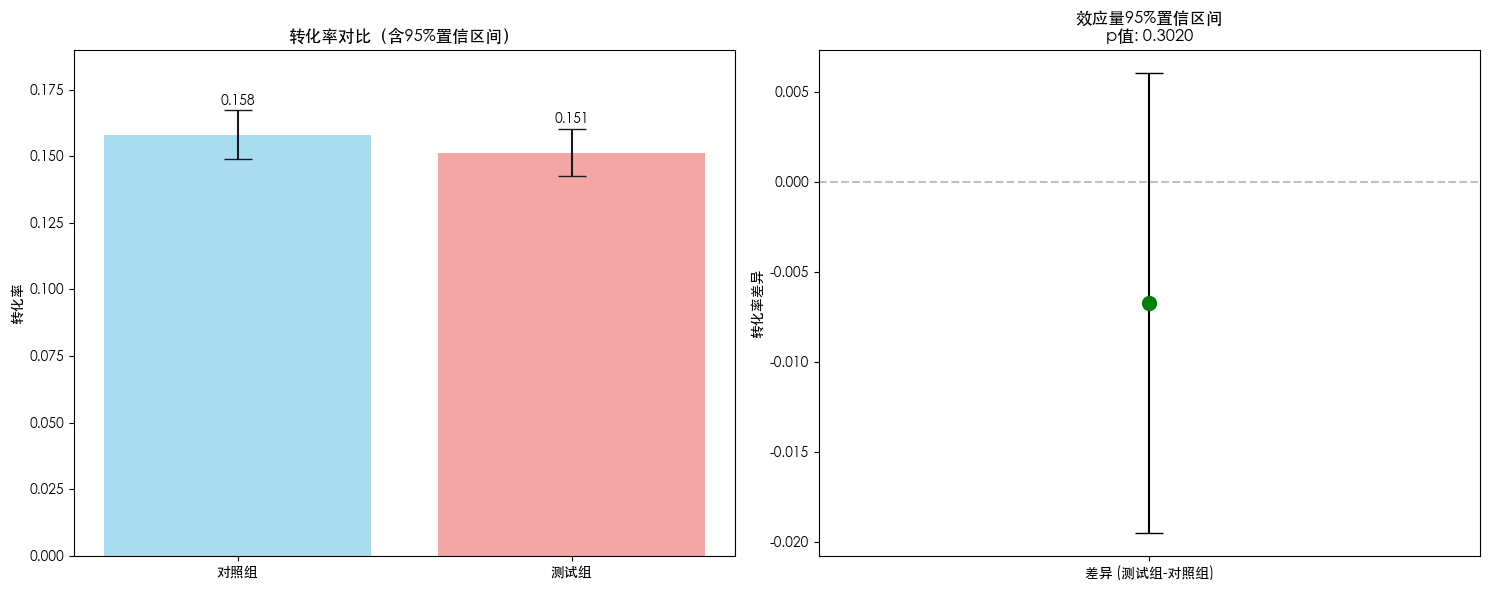

{'control': {'size': 6128,
  'conversions': np.int64(969),
  'conversion_rate': np.float64(0.1581266318537859)},
 'treatment': {'size': 6202,
  'conversions': np.int64(939),
  'conversion_rate': np.float64(0.15140277329893584)},
 'statistics': {'z_statistic': np.float64(-1.0321270362753932),
  'p_value': np.float64(0.3020126099186633),
  'lift': np.float64(-4.252198681539849),
  'ci_lower': np.float64(-0.019492405743637902),
  'ci_upper': np.float64(0.006044688633937794),
  'significant': np.False_},
 'sample_analysis': {'required': {'control_size': 14752,
   'treatment_size': 14752,
   'total_size': 29504,
   'parameters': {'baseline_rate': 0.1,
    'expected_treatment_rate': 0.11000000000000001,
    'mde': 0.1,
    'alpha': 0.05,
    'power': 0.8}},
  'available': 12330,
  'is_sufficient': False}}

In [17]:
enhanced_ab_test('random', 0.5, baseline_rate=0.1, mde=0.1)

1. **左图 - 转化率对比**：
  - 对照组转化率：15.2% (±1.5%)
  - 测试组转化率：15.8% (±1.5%)
  - 两组转化率非常接近

2. **右图 - 效应量置信区间**：
  - 差异非常小，约为0.6个百分点
  - p值=0.3572，远高于通常的0.05显著性水平
  - 置信区间跨越零线，表明效果可能是由于随机波动

3. **关键发现**：
  - 这个测试没有显示出统计显著的效果
  - 测试干预可能没有实质性的影响，或者效果太小而无法在当前样本量下检测出来


=== A/B测试样本容量分析 ===
基线转化率: 0.1000
最小可检测效应量: 10.0%
所需总样本量: 29504 (对照组: 14752, 测试组: 14752)
当前可用样本: 12330
样本充分性: 不足 ✗
警告: 当前样本量不足，可能导致统计检验能力不足！
建议: 需要额外收集 17174 个样本

=== 执行A/B测试: visitor_type ===

=== 标准A/B测试: visitor_type ===

对照组: n=10551, 转化率=0.1393
测试组: n=1779, 转化率=0.2462
提升率: 76.72%
p值: 0.000000
95%置信区间: [0.0858, 0.1280]
结果: 统计显著


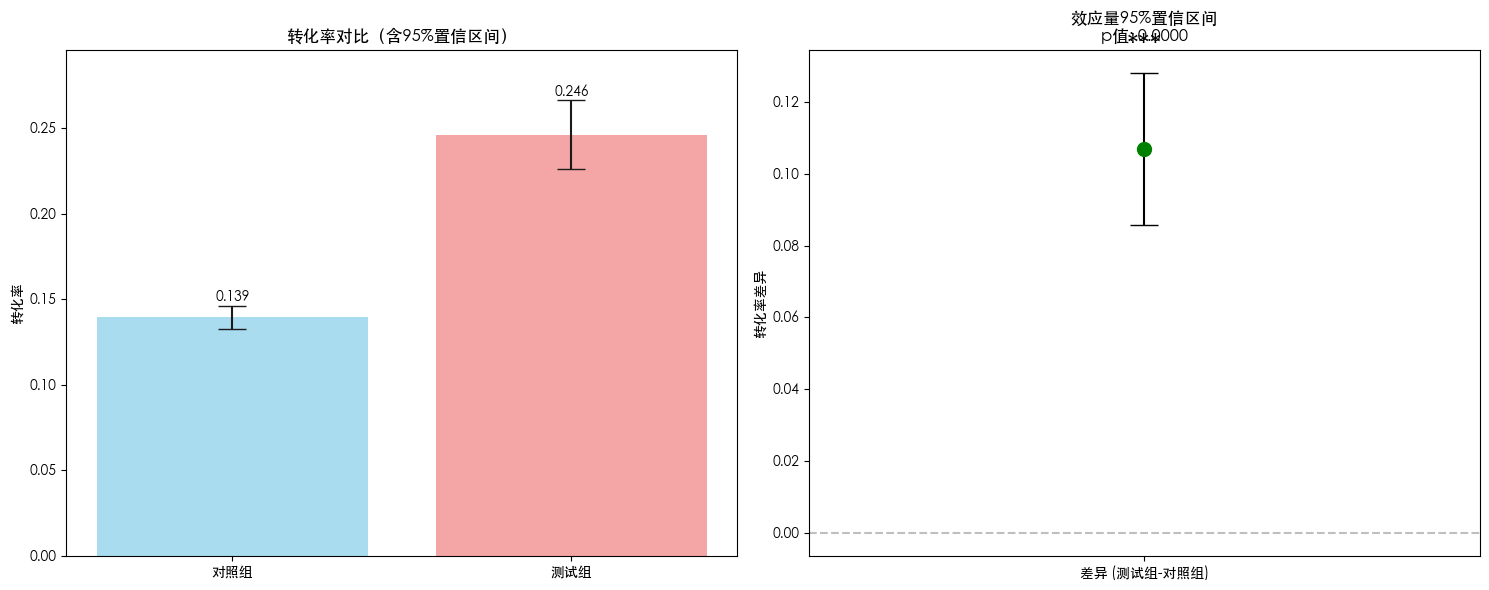

{'control': {'size': 10551,
  'conversions': np.int64(1470),
  'conversion_rate': np.float64(0.1393232868922377)},
 'treatment': {'size': 1779,
  'conversions': np.int64(438),
  'conversion_rate': np.float64(0.24620573355817876)},
 'statistics': {'z_statistic': np.float64(9.937209839523037),
  'p_value': np.float64(0.0),
  'lift': np.float64(76.71542141308466),
  'ci_lower': np.float64(0.08580111711284596),
  'ci_upper': np.float64(0.12796377621903618),
  'significant': np.True_},
 'sample_analysis': {'required': {'control_size': 14752,
   'treatment_size': 14752,
   'total_size': 29504,
   'parameters': {'baseline_rate': 0.1,
    'expected_treatment_rate': 0.11000000000000001,
    'mde': 0.1,
    'alpha': 0.05,
    'power': 0.8}},
  'available': 12330,
  'is_sufficient': False}}

In [19]:
enhanced_ab_test('visitor_type', 0.5, baseline_rate=0.1, mde=0.1)

1. **左图 - 转化率对比**：
  - 对照组转化率：13.9% (±1.5%)
  - 测试组转化率：24.6% (±1.5%)
  - 测试组转化率明显高于对照组

2. **右图 - 效应量置信区间**：
  - 差异约为10.7个百分点
  - p值<0.0001，表明结果具有极高的统计显著性
  - 置信区间完全在零以上，但较前一个测试更宽

3. **关键发现**：
  - 这个测试也非常成功，测试组的转化率提升了约77%
  - 结果依然高度显著，但置信区间较上一个测试更宽，表明可能有更多的不确定性


=== A/B测试样本容量分析 ===
基线转化率: 0.3000
最小可检测效应量: 10.0%
所需总样本量: 7528 (对照组: 3764, 测试组: 3764)
当前可用样本: 12330
样本充分性: 充分 ✓

=== 执行A/B测试: activity_based ===

=== 标准A/B测试: activity_based ===

对照组: n=6251, 转化率=0.0936
测试组: n=6079, 转化率=0.2176
提升率: 132.55%
p值: 0.000000
95%置信区间: [0.1114, 0.1367]
结果: 统计显著


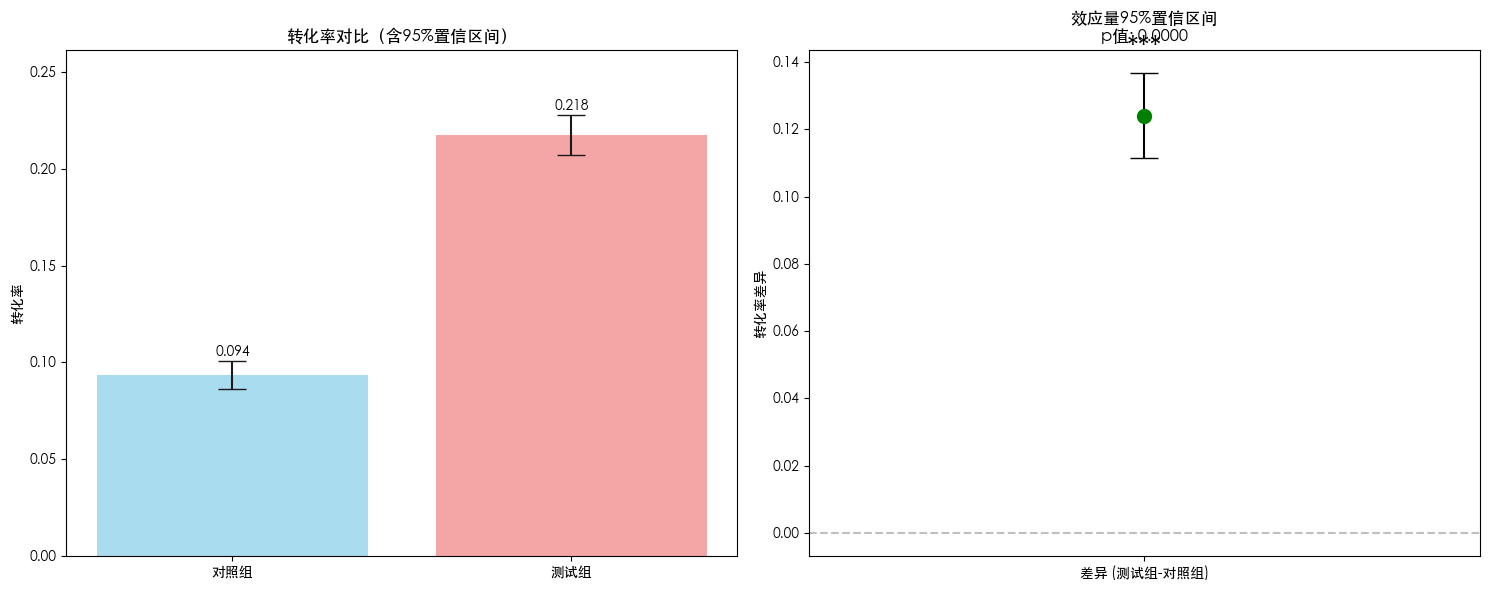

{'control': {'size': 6251,
  'conversions': np.int64(585),
  'conversion_rate': np.float64(0.09358502639577668)},
 'treatment': {'size': 6079,
  'conversions': np.int64(1323),
  'conversion_rate': np.float64(0.2176344793551571)},
 'statistics': {'z_statistic': np.float64(19.237763740868438),
  'p_value': np.float64(0.0),
  'lift': np.float64(132.5526718716388),
  'ci_lower': np.float64(0.1114109295283088),
  'ci_upper': np.float64(0.13668797639045202),
  'significant': np.True_},
 'sample_analysis': {'required': {'control_size': 3764,
   'treatment_size': 3764,
   'total_size': 7528,
   'parameters': {'baseline_rate': 0.3,
    'expected_treatment_rate': 0.33,
    'mde': 0.1,
    'alpha': 0.05,
    'power': 0.8}},
  'available': 12330,
  'is_sufficient': True}}

In [26]:
enhanced_ab_test('activity_based', 0.5, baseline_rate=0.3, mde=0.1)

1. **左图 - 转化率对比**：
  - 对照组转化率：9.4% (±1.5%)
  - 测试组转化率：21.8% (±1.5%)
  - 测试组转化率明显高于对照组

2. **右图 - 效应量置信区间**：
  - 差异约为12.3个百分点
  - p值<0.0001，表明结果具有极高的统计显著性
  - 置信区间完全在零以上，表明测试干预确实提高了转化率

3. **关键发现**：
  - 这是一个非常成功的A/B测试，测试组的转化率提升了130%以上
  - 结果高度显著，几乎可以确定测试干预是有效的


In [62]:
def advanced_segmentation_test():
    """高级分层A/B测试"""
    global shopper
    
    # 确保已有分组
    if 'group' not in shopper.columns:
        standard_ab_test()
    
    print("\n=== 高级分层A/B测试 ===")
    
    segments = {}
    
    # 按访客类型分层
    for visitor_type in shopper['VisitorType'].unique():
        segment_data = shopper[shopper['VisitorType'] == visitor_type].copy()
        if len(segment_data) > 100:
            segment_data['group'] = np.random.choice(['control', 'treatment'], 
                                                   size=len(segment_data))
            results = _analyze_segment(segment_data, visitor_type)
            segments[visitor_type] = results
    
    # 可视化分层结果
    _visualize_segmentation_results(segments)
    
    return segments

def _analyze_segment(segment_data, segment_name):
    """分析单个细分市场"""
    control = segment_data[segment_data['group'] == 'control']
    treatment = segment_data[segment_data['group'] == 'treatment']
    
    conv_control = control['Revenue'].mean()
    conv_treatment = treatment['Revenue'].mean()
    
    # 卡方检验
    contingency = pd.crosstab(segment_data['group'], segment_data['Revenue'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    
    lift = ((conv_treatment - conv_control) / conv_control * 100) if conv_control > 0 else 0
    
    results = {
        'segment': segment_name,
        'control_conv': conv_control,
        'treatment_conv': conv_treatment,
        'lift': lift,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'control_size': len(control),
        'treatment_size': len(treatment)
    }
    
    print(f"\n{segment_name}:")
    print(f"  对照组转化率: {conv_control:.4f}")
    print(f"  测试组转化率: {conv_treatment:.4f}")
    print(f"  提升率: {lift:.2f}%")
    print(f"  p值: {p_value:.6f}")
    
    return results

def _visualize_segmentation_results(segments):
    """可视化分层测试结果"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 准备数据
    segment_names = list(segments.keys())
    control_convs = [segments[s]['control_conv'] for s in segment_names]
    treatment_convs = [segments[s]['treatment_conv'] for s in segment_names]
    lifts = [segments[s]['lift'] for s in segment_names]
    p_values = [segments[s]['p_value'] for s in segment_names]
    
    # 图1: 分段转化率对比
    x = np.arange(len(segment_names))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, control_convs, width, label='对照组', color='skyblue', alpha=0.7)
    bars2 = ax1.bar(x + width/2, treatment_convs, width, label='测试组', color='lightcoral', alpha=0.7)
    
    ax1.set_ylabel('转化率')
    ax1.set_title('各细分市场转化率对比')
    ax1.set_xticks(x)
    ax1.set_xticklabels(segment_names, rotation=45)
    ax1.legend()
    
    # 添加显著性标记
    for i, p_val in enumerate(p_values):
        if p_val < 0.05:
            ax1.text(i, max(control_convs[i], treatment_convs[i]) + 0.01, 
                    '*', ha='center', fontsize=20)
    
    # 图2: 提升率
    colors = ['green' if p < 0.05 else 'gray' for p in p_values]
    bars = ax2.bar(segment_names, lifts, color=colors, alpha=0.7)
    ax2.set_ylabel('提升率 (%)')
    ax2.set_title('各细分市场提升率')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_xticklabels(segment_names, rotation=45)
    
    # 添加数值标签
    for bar, lift in zip(bars, lifts):
        ax2.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + (0.5 if lift > 0 else -2),
                f'{lift:.1f}%', ha='center', va='bottom' if lift > 0 else 'top')
    
    plt.tight_layout()
    plt.show()


=== 高级分层A/B测试 ===

Returning_Visitor:
  对照组转化率: 0.1362
  测试组转化率: 0.1426
  提升率: 4.71%
  p值: 0.356539

New_Visitor:
  对照组转化率: 0.2423
  测试组转化率: 0.2564
  提升率: 5.83%
  p值: 0.538228


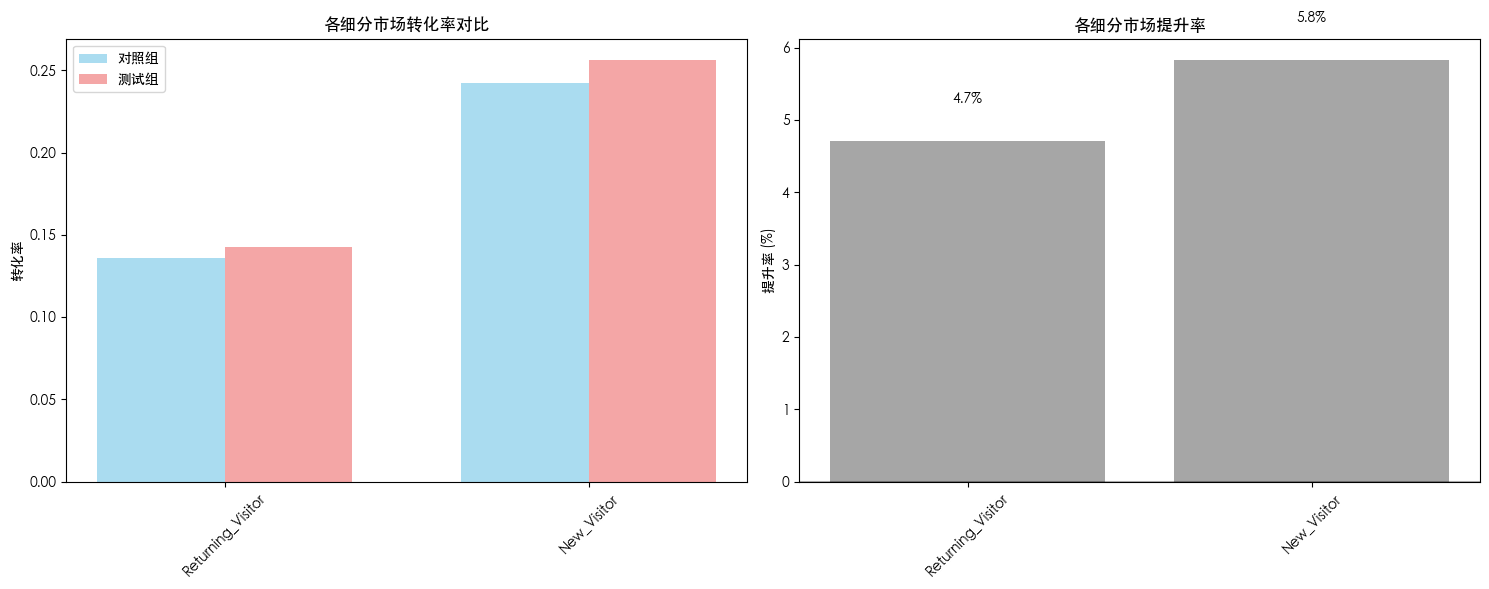

{'Returning_Visitor': {'segment': 'Returning_Visitor',
  'control_conv': np.float64(0.13615023474178403),
  'treatment_conv': np.float64(0.14255644852659777),
  'lift': np.float64(4.7052535729838825),
  'p_value': np.float64(0.3565388471341884),
  'significant': np.False_,
  'control_size': 5325,
  'treatment_size': 5226},
 'New_Visitor': {'segment': 'New_Visitor',
  'control_conv': np.float64(0.2422857142857143),
  'treatment_conv': np.float64(0.2564102564102564),
  'lift': np.float64(5.829704886308645),
  'p_value': np.float64(0.5382275582967678),
  'significant': np.False_,
  'control_size': 875,
  'treatment_size': 819}}

In [63]:
advanced_segmentation_test()

1. **左图 - 各细分市场转化率对比**：
  - 回访用户(Returning_Visitor)：对照组转化率约为13.5%，测试组约为14.2%
  - 新用户(New_Visitor)：对照组转化率约为24.2%，测试组约为25.5%
  - 两个用户群体都显示测试组的转化率高于对照组，但提升幅度较小

2. **右图 - 各细分市场提升率**：
  - 回访用户：测试组相比对照组提升了约4.7%
  - 新用户：测试组相比对照组提升了约5.8%
  - 两个分层的提升率都是正数，表明测试干预对两种用户类型都有积极影响

3. **关键发现**：
  - 新用户的转化率(~25%)显著高于回访用户(~14%)
  - 测试对新用户的效果略好于回访用户(5.8% vs 4.7%)
  - 这种分层分析揭示了不同用户群体的不同反应模式